# Intelligent World Informatics LectureV: Assignment Week 12
- Author: Paul Lödige (ploedige@g.ecc.u-tokyo.ac.jp)
- Student ID: 37-229753

## Assignment
- Define your own project
  - Describe the task and the goal you would like to achieve
  - Experiment on any public dataset provided by Tensorflow:
    - Full list: https://www.tensorflow.org/datasets/catalog/overview
    - Simple datasets: https://www.tensorflow.org/api_docs/python/tf/keras/datasets
  - Do one of the followings:
    1. Apply two different deep learning techniques you learned from this class
       - e.g.: Comparing Dense DNN vs RNN method on the same dataset (what pros and cons?)
       - e.g.: Combining CNN and RNN on a dataset (why the combination is preferable?)
    2. Apply transfer learning with two different base models
       - Explain the reasons why the base models are reasonable choices.
       - Survey on the internet with keywords such as “best model for imagenet/cifar10/mnist”, “tensorflow pre-trained models”, etc, to find the name of the model
       - Download the base model through tensorflow
         - Just like in the code, simply change the name of the base model. List of available base models in Tensorflow:
           - https://www.tensorflow.org/api_docs/python/tf/keras/applications
         - Add layers, dropouts, use different learning rate, epoch, batch_size, etc.

### Additional Details
- Write 1 ~ 2 page(s) (excluding the code) describing your project:
  - Imagine the project as a kind of “mini research paper”
  - What is the problem? What is your motivation?
  - How are you solving them? What deep learning algorithms?
  - Outline the experiment and test on the dataset.
  - What are the results?
    - Add at least 1 figure and insert your analysis
  - Attach the code at the end.
  - Include your name, affiliation, student number, as well as your university e-mail address in case if we need to contact you for clarification
  - Put all the above in a single PDF and upload to ITC-LMS

### How the project is graded
- The purpose of the project is to make you familiar with machine learning experiments.
  - Not intended to be a stressful project.
    - So do not worry too much on achieving high accuracy, good parameter settings, etc
    - Make sure to keep it simple
- What we would like to see:
  - Clarity of the project description
  - Relevance between the problem and the chosen approaches
  - Appropriate input/output design and execution of the experiments
  - Proper evaluation methods, figures and tables
  - Easy to understand writings, informative comments on the code
- Overall grade for this course : 70% homeworks, 30% final project
  - Bonus points for helping each other on slack
    - Feel free to discuss your final project on slack if you have troubles

## Code
### Import libraries

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import tkinter.messagebox # for notifications

2023-01-26 21:34:00.079060: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 21:34:00.265623: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-26 21:34:00.265685: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-26 21:34:01.290086: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

#### Load Dataset

In [2]:
# define dataset
mnist = datasets.
# split into training and test data
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0


#### Confirm Data

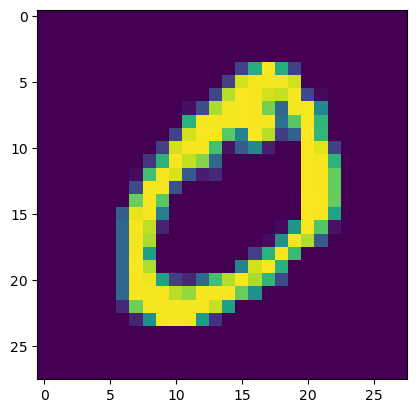

In [3]:
plt.imshow(x_train[1])
plt.show()

#### Configurations
The following is a list of the neural network configurations that will be compared:

In [4]:
configs = {}

In [5]:
configs['with SimpleRNN (lecture example)'] = {
        'model': models.Sequential([
            layers.SimpleRNN(64, input_shape=(28, 28), activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 5,
        'batch_size': 64
    }

2023-01-26 15:11:31.700488: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-26 15:11:31.700746: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-26 15:11:31.700798: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (paul-laptop): /proc/driver/nvidia/version does not exist
2023-01-26 15:11:31.701790: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
configs['with LSTM (lecture example)'] = {
        'model': models.Sequential([
            layers.LSTM(64, input_shape=(28, 28), activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 5,
        'batch_size': 64
    }

In [7]:
configs['Custom 1'] = {
        'model': models.Sequential([
            layers.LSTM(64, input_shape=(28, 28), activation='relu', return_sequences=True),
            layers.LSTM(64, activation='relu', dropout=0.1, recurrent_dropout=0.1, return_sequences=True),
            layers.LSTM(64, activation='relu', dropout=0.1, recurrent_dropout=0.1, return_sequences=True),
            layers.LSTM(64, activation='relu', dropout=0.1, recurrent_dropout=0.1, return_sequences=True),
            layers.LSTM(64, activation='relu', dropout=0.1, recurrent_dropout=0.1),
            layers.Dense(32, activation='relu'),
            layers.Dropout(rate=0.1),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 5,
        'batch_size': 64
    }

In [8]:
configs['Custom 2'] = {
        'model': models.Sequential([
            layers.LSTM(64, input_shape=(28, 28), activation='relu', return_sequences=True),
            layers.LSTM(64, activation='relu', dropout=0.2, recurrent_dropout=0.2),
            layers.Dense(32, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dropout(rate=0.1),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 5,
        'batch_size': 64
    }

In [9]:
configs['Custom 3'] = {
        'model': models.Sequential([
            layers.LSTM(64, input_shape=(28, 28), activation='relu', return_sequences=True),
            layers.LSTM(64, activation='relu', dropout=0.2, recurrent_dropout=0.2),
            layers.Dense(32, activation='relu'),
            layers.Dropout(rate=0.2),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 5,
        'batch_size': 64
    }

In [10]:
configs['Custom 4'] = {
        'model': models.Sequential([
            layers.LSTM(64, input_shape=(28, 28), activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dropout(rate=0.2),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 5,
        'batch_size': 64
    }

#### Compile the Models

In [11]:
for config in configs.values():
    if 'history' not in config.keys():
        config['model'].compile(
            optimizer=config['optimizer'],
            loss=config['loss'],
            metrics=config['metrics']
        )

#### Train and Evaluate the Models

In [12]:
try:
    for config_name, config in configs.items():
        if 'history' in config.keys():
            print(f'Already trained model "{config_name}"')
        else:
            print(f'Now training model "{config_name}"')
            config['history'] = config['model'].fit(x_train, y_train, epochs=config['epochs'], validation_data=(x_test, y_test), batch_size=config['batch_size'])#, verbose=0)
except:
    tkinter.messagebox.showerror("ERROR", "ERROR")

Now training model "with SimpleRNN (lecture example)"


2023-01-26 15:11:33.331290: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


#### Plot the accuracy

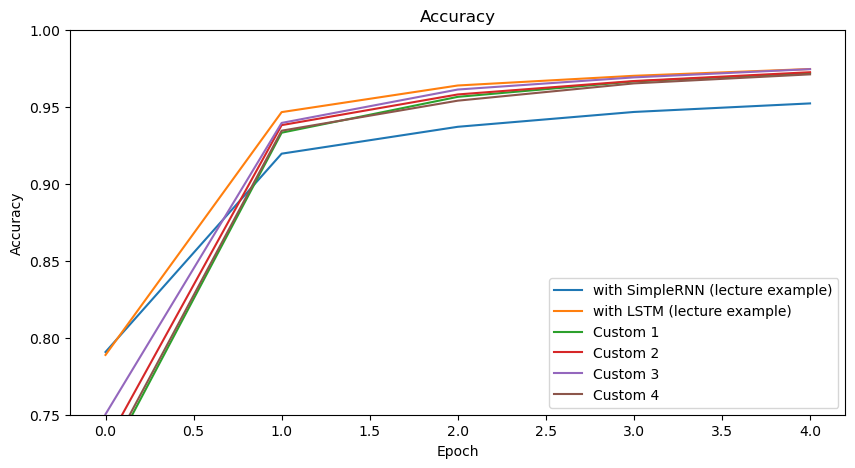

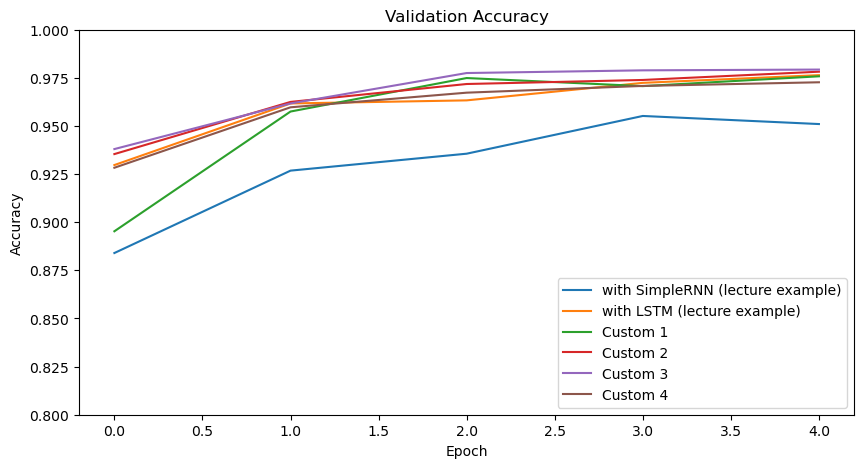

In [ ]:
plt.figure(figsize=(10,5))
for config_name, config in configs.items():
    plt.plot(config['history'].history['accuracy'], label=config_name)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')
plt.title("Accuracy")
plt.show()

plt.figure(figsize=(10,5))
for config_name, config in configs.items():
    plt.plot(config['history'].history['val_accuracy'], label=config_name)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title("Validation Accuracy")
plt.show()

### Notify when done

In [ ]:
tkinter.messagebox.showinfo("DONE", "DONE")

'ok'